In [40]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
!pip3 install -U ucimlrepo 

In [52]:
from ucimlrepo import fetch_ucirepo 
  

heart_disease = fetch_ucirepo(id=45) 
  
 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
print(heart_disease.metadata) 
  
 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

1.Clean your dataset to turn categorical values into numerical ones. One-hot encoding is likely the answer, but it depends on the dataset. Your data may have ordinal columns, for example where one-hot encoding is not as appropriate.

In [59]:
from sklearn.preprocessing import LabelEncoder
X = pd.DataFrame(heart_disease.data.features, heart_disease.data.feature_names) 
y = pd.Series(heart_disease.data.targets.squeeze(),name='Outcomes') 

class_labels = LabelEncoder()

X['sexs'] = class_labels.fit_transform(X['sex'].values)
X['cps'] = class_labels.fit_transform(X['cp'].values)
X['trestbpsx'] = class_labels.fit_transform(X['trestbps'].values)
X['chols'] = class_labels.fit_transform(X['chol'].values) 
X['fbsx'] = class_labels.fit_transform(X['fbs'].values) 
X['restecgs'] = class_labels.fit_transform(X['restecg'].values)  
X['thalachs'] = class_labels.fit_transform(X['thalach'].values)    
X['exangs'] = class_labels.fit_transform(X['exang'].values)  
X['oldpeaks'] = class_labels.fit_transform(X['oldpeak'].values)
X['slopes'] = class_labels.fit_transform(X['slope'].values)
X['cas'] = class_labels.fit_transform(X['ca'].values)  
X['thals'] = class_labels.fit_transform(X['thal'].values)   
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,trestbpsx,chols,fbsx,restecgs,thalachs,exangs,oldpeaks,slopes,cas,thals
0,63,1,1,145,233,1,2,150,0,2.3,...,31,64,1,2,49,0,22,2,0,1
1,67,1,4,160,286,0,2,108,1,1.5,...,40,111,0,2,10,1,15,1,3,0
2,67,1,4,120,229,0,2,129,1,2.6,...,14,60,0,2,29,1,25,1,2,2
3,37,1,3,130,250,0,0,187,0,3.5,...,22,80,0,0,84,0,32,2,0,0
4,41,0,2,130,204,0,2,172,0,1.4,...,22,35,0,2,71,0,14,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,...,8,93,0,0,32,0,12,1,0,2
299,68,1,4,144,193,1,0,141,0,3.4,...,30,26,1,0,40,0,31,1,2,2
300,57,1,4,130,131,0,0,115,1,1.2,...,22,1,0,0,16,1,12,1,1,2
301,57,0,2,130,236,0,2,174,0,0.0,...,22,67,0,2,73,0,0,1,1,0


2.Perform univariate linear regression on the 
dataset. Select your variable to predict. How well did this model perform? 
Is this a good approach for this dataset? Why or why not?

In [75]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = X[['trestbpsx']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


LinearRegression()

In [76]:
y_pred = reg_model.predict(X_test)
y_pred

array([0.88969909, 0.59711299, 0.80610306, 0.45081994, 0.88969909,
       1.01509314, 0.95239611, 0.76430505, 1.16138619, 0.95239611,
       0.72250703, 0.70160803, 0.618012  , 1.16138619, 0.88969909,
       0.59711299, 0.88969909, 0.9105981 , 0.63891101, 0.88969909,
       0.65981001, 0.88969909, 1.01509314, 0.72250703, 1.30767924,
       0.74340604, 0.65981001, 0.59711299, 1.41217427, 0.70160803,
       0.80610306, 1.11958817, 0.72250703, 1.26588122, 1.01509314,
       0.82700207, 0.80610306, 0.72250703, 0.88969909, 0.59711299,
       0.88969909, 1.01509314, 0.72250703, 1.01509314, 0.72250703,
       1.09868916, 0.88969909, 0.88969909, 0.72250703, 0.70160803,
       0.99419413, 0.72250703, 0.95239611, 1.01509314, 0.88969909,
       0.59711299, 0.84790108, 0.72250703, 0.88969909, 0.99419413,
       1.24498222])

In [77]:
accuracy_score = reg_model.score(X_test, y_test)
print(accuracy_score)

-0.06041111655365827


In [78]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.06041111655365827

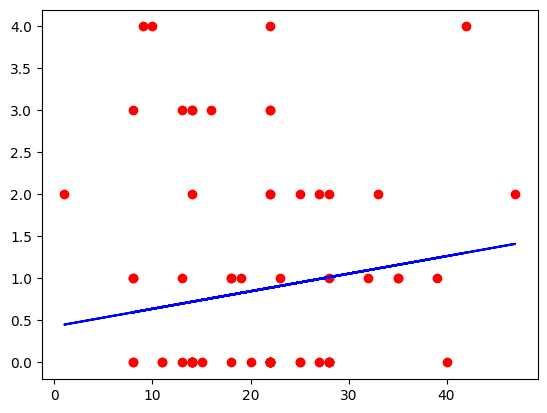

In [79]:
plt.scatter(X_test, y_test, color = 'r')
plt.plot(X_test, y_pred, color='b')

This model didnt really preform well in my eyes as it seems all scattered and not follwoing the line. I dont think this 
a good approach for this dataset due to all the points being scattered.

3. Perform KNN on this dataset. As part of this, write a function that selects the optimal value of k. How well did this model perform?

In [96]:
from sklearn.neighbors import KNeighborsClassifier



X = pd.DataFrame(heart_disease.data.features, heart_disease.data.feature_names) 
y = pd.Series(heart_disease.data.targets.squeeze(),name='Outcomes') 

X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13) 
knn.fit(X_train, y_train) 

y_pred = knn.predict(X_test)
print(y_pred)
print(type(y_pred))

[1 3 2 0 1 2 1 1 0 0 0 0 0 1 2 0 0 2 2 0 0 0 3 0 2 0 0 2 0 0 0 0 0 0 0 0 1
 0 2 0 2 0 1 0 0 2 0 0 3 1 0 0 0 0 2 0 0 2 1 2 0 0 0 0 0 2 0 0 0 3 0 0 0 0
 0 0 0 1 0 3 0 0 0 0 2 0 3 0 1 1 0]
<class 'numpy.ndarray'>


In [97]:
print(knn.score(X_test, y_test))

0.5714285714285714


In [112]:
X_test = X_test[:, :5]
X = pd.DataFrame(X_test, columns = X.columns[:5])
X['Actual_Outcome'] = y_test.tolist()
X['Predicted_Outcome'] = y_pred.tolist()
X.head(14)

,age,sex,cp,trestbps,chol,Actual_Outcome,Predicted_Outcome
0,-0.187100,0.717137,-0.119614,-0.128004,0.001991,0,1
1,-0.077829,0.717137,0.894716,-1.200609,-0.842280,3,3
2,0.140711,0.717137,0.894716,-0.396155,0.065312,1,2
3,0.359252,0.717137,0.894716,-1.736912,-0.251290,2,0
4,-0.405640,-1.394433,0.894716,-0.128004,1.247291,2,1
5,-0.187100,0.717137,0.894716,0.408298,-0.905600,1,2
6,1.124144,0.717137,0.894716,0.140147,0.170845,2,1
7,-0.187100,0.717137,0.894716,-0.503416,0.761835,3,1
8,-1.607613,0.717137,0.894716,1.051861,-0.483465,1,0
9,0.468522,0.717137,0.894716,0.140147,-0.251290,0,0


In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test, y_pred)

array([[44,  1,  2,  1,  0],
       [ 7,  4,  5,  1,  0],
       [ 4,  2,  3,  3,  0],
       [ 2,  5,  2,  1,  0],
       [ 1,  0,  3,  0,  0]])